# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">UNet Using TensorFlow and Keras Starter Notebook</p>
<img src="https://production-media.paperswithcode.com/methods/Screen_Shot_2020-07-07_at_9.08.00_PM_rpNArED.png">
<div style="text-align: center;">
  <a href="https://paperswithcode.com/method/u-net" style="color:#1a05ad;display:inline-block;">Source</a>
</div>
<p style="font-family:newtimeroman;font-size:120%;color:#302f36;">U-Net is a convolutional neural network architecture that was developed for and has since become widely adopted in the field of biomedical image segmentation. It was first introduced in a paper by Olaf Ronneberger, Philipp Fischer, and Thomas Brox in 2015, titled <a href="https://arxiv.org/abs/1505.04597" style="color:#1a05ad;">U-Net: Convolutional Networks for Biomedical Image Segmentation</a>. The architecture is designed to work with a very limited number of images and to yield more precise segmentations.
    
### <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Key Features of U-Net</p>   


| Feature           | Description |
| ----------------- | ----------- |
| Symmetric Architecture | U-Net has a U-shaped architecture, with a contracting path for context capture and an expanding path for precise localization. |
| Contracting Path | Composed of convolutional and max pooling layers, it down-samples the input image to capture context while reducing dimensions. |
| Expanding Path | Includes up-convolutions and concatenations with features from the contracting path for precise localization. |
| Skip Connections | Feature maps from the contracting path are concatenated with the expanding path to retain image details during upsampling. |
| Fewer Training Samples | Designed to learn from a small dataset, using data augmentation to increase sample diversity. |
| Final Layer | Uses a 1x1 convolution to map feature vectors to the number of classes per pixel. |

### <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Applications of U-Net</p>   

| Application      | Description |
| ---------------- | ----------- |
| Medical Image Segmentation | Used for segmenting cells or tissues in medical scans. |
| General Image Segmentation | Applicable to tasks like satellite image analysis and scene understanding. |

### <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Performance of U-Net</p>   

| Aspect            | Description |
| ----------------- | ----------- |
| Small Dataset Performance | Known for its effectiveness with small datasets, which is common in medical imaging. |
| Precise Localization | Its architecture enables precise localization of structures within images. |
| Inspirational Design | Has inspired variations and improvements for specific tasks, including 3D segmentation. |

# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">TABLE OF CONTENTS</p> 
    
* [1. Importing Libraries](#1)
    
* [2. Data Loading & Visualizing Images](#2)
    
* [3. Visualizing Distribution of Pixel Values](#3)
        
* [4. Preprocessing the Images and Masks](#4)  
    
* [5. Splitting the Dataset](#5) 
      
* [6. Building the UNet Model](#6)
    
* [7. Instantiating The UNet Model and Visualizing the Architechture](#7)

* [8. Model Training](#8)

* [9. Model Evaluation](#9)

* [10. Conclusion and Future Directions](#10)

<a id='1'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Importing Libraries</p> 

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tifffile as tiff
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Checking if GPU is available

In [2]:
# Check if GPU is available and output the device name
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    print("GPU is available:", gpu_devices)
    for device in gpu_devices:
        tf.config.experimental.set_memory_growth(device, True)
else:
    print("GPU is not available, using CPU instead.")


GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


<a id='2'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Visualizing Samples</p> 

In [3]:
# Set the base path
base_path = '/kaggle/input/blood-vessel-segmentation/train'  

# Replace 'kidney_1_dense' with the dataset you want to explore
dataset = 'kidney_1_voi'

# Paths to images and labels
images_path = os.path.join(base_path, dataset, 'images')
labels_path = os.path.join(base_path, dataset, 'labels')

# List the files in the directories
image_files = sorted([os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith('.tif')])
label_files = sorted([os.path.join(labels_path, f) for f in os.listdir(labels_path) if f.endswith('.tif')])

# Function to display a set of images
def show_images(images, titles=None, cmap='gray'):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(20, 10))
    if not isinstance(axes, np.ndarray):
        axes = [axes]
    for idx, ax in enumerate(axes):
        ax.imshow(images[idx], cmap=cmap)
        if titles:
            ax.set_title(titles[idx])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

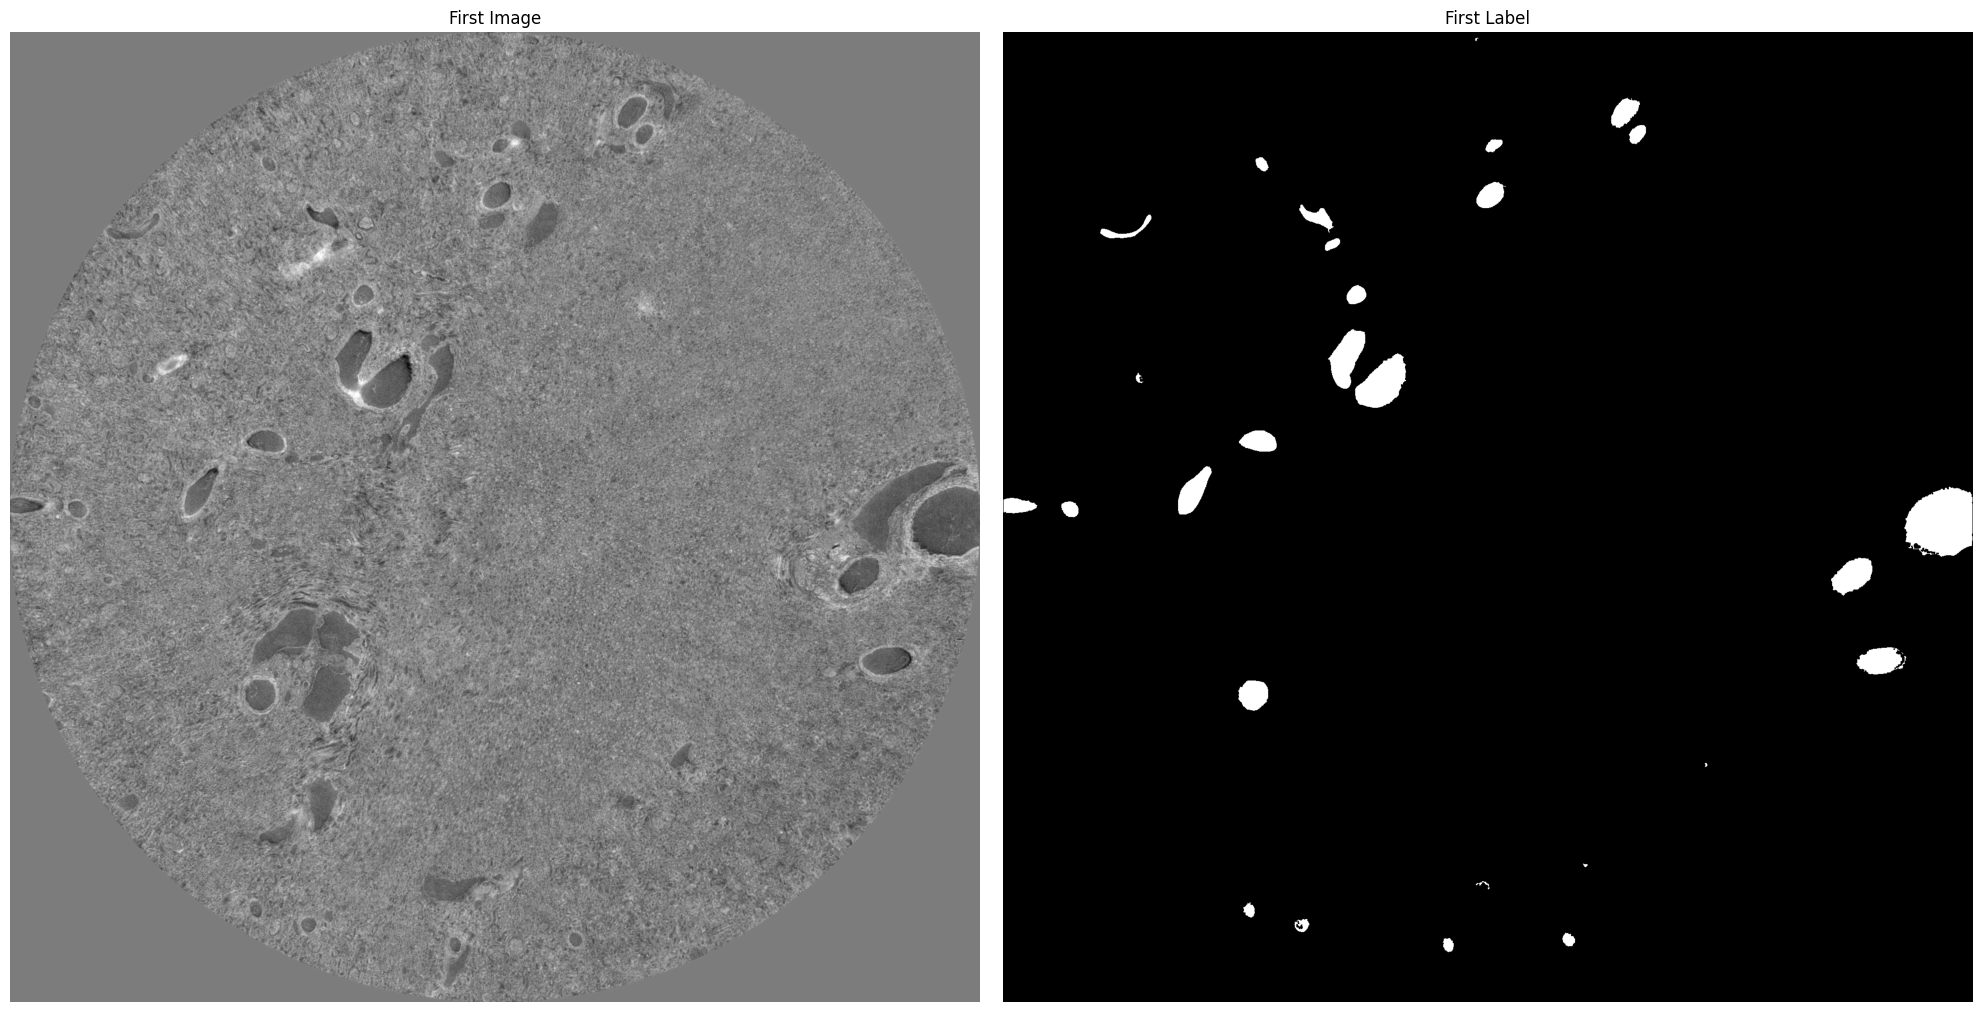

Number of images: 1397
Image shapes: {(1928, 1928)}


In [4]:
# Load and display the first image and its mask
first_image = tiff.imread(image_files[0])
first_label = tiff.imread(label_files[0])

show_images([first_image, first_label], titles=['First Image', 'First Label'])

# Basic statistics about the images
image_shapes = [tiff.imread(file).shape for file in image_files]

print(f"Number of images: {len(image_files)}")
print(f"Image shapes: {set(image_shapes)}")

<a id='3'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Visualizing Distribution of Pixel Values</p> 

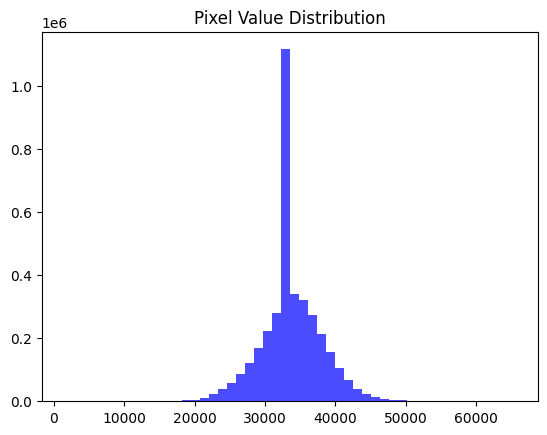

In [5]:
# It's useful to see the distribution of pixel values
pixel_values = first_image.flatten()
plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.show()

<a id='4'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Preprocessing the Images AND Masks</p> 

In [6]:
def preprocess_image(path):
    # Load the image using tifffile
    image = tiff.imread(path)
    
    # If the image has more than one channel, extract just one channel
    if image.ndim > 2 and image.shape[2] > 1:
        image = image[..., 0]
    
    # Normalize the image to [0, 1] range
    image = image / 255.0
    
    # Convert image to a TensorFlow tensor
    image_tensor = tf.convert_to_tensor(image, dtype=tf.float32)
    
    # Add a channel dimension if it does not exist
    if image_tensor.ndim == 2:
        image_tensor = image_tensor[..., tf.newaxis]
    
    # Ensure image tensor is 3D at this point
    if image_tensor.ndim != 3:
        raise ValueError('Image tensor must be 3 dimensions [height, width, channels]')
    
    # Resize the image to the desired size
    image_tensor = tf.image.resize(image_tensor, [256, 256])
    
    return image_tensor

In [7]:
def preprocess_mask(path):
    # Load the mask using tifffile
    mask = tiff.imread(path)
    
    # If the mask has more than one channel, extract just one channel
    if mask.ndim > 2 and mask.shape[2] > 1:
        mask = mask[..., 0]
    
    # Normalize the mask to be in [0, 1]
    mask = mask / 255.0 if mask.max() > 1 else mask
    
    # Convert mask to a TensorFlow tensor
    mask_tensor = tf.convert_to_tensor(mask, dtype=tf.float32)
    
    # Add a channel dimension if it does not exist
    if mask_tensor.ndim == 2:
        mask_tensor = mask_tensor[..., tf.newaxis]
    
    # Ensure mask tensor is 3D at this point
    if mask_tensor.ndim != 3:
        raise ValueError('Mask tensor must be 3 dimensions [height, width, channels]')
    
    # Resize the mask to the desired size
    mask_tensor = tf.image.resize(mask_tensor, [256, 256], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    
    # The resize operation could push the values away from 0 and 1, we threshold to ensure it's a proper mask
    mask_tensor = tf.where(mask_tensor > 0.5, 1, 0)
    
    return mask_tensor

<a id='5'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Splitting the Dataset</p> 

In [8]:
# Subset 20% of the dataset for quick experiments
subset_size = int(0.2 * len(image_files))
image_files_subset = image_files[:subset_size]
label_files_subset = label_files[:subset_size]

# Preprocess and load images into memory (This might take a lot of RAM, be careful with large datasets)
images = np.array([preprocess_image(f) for f in image_files_subset])
masks = np.array([preprocess_mask(f) for f in label_files_subset])

# Split into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.1, random_state=42)

<a id='6'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Building the UNet Model</p> 

In [9]:
# Define the U-Net model
def get_unet_model(input_shape=(256, 256, 1)):
    inputs = keras.Input(shape=input_shape)

    # Contraction path
    c1 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = layers.Dropout(0.1)(c1)
    c1 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = layers.Dropout(0.1)(c2)
    c2 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = layers.Dropout(0.2)(c3)
    c3 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    c4 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = layers.Dropout(0.2)(c4)
    c4 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = layers.MaxPooling2D(pool_size=(2, 2))(c4)

    # Middle
    c5 = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = layers.Dropout(0.3)(c5)
    c5 = layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    # Expansive path 
    u6 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c4])
    c6 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = layers.Dropout(0.2)(c6)
    c6 = layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c3])
    c7 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = layers.Dropout(0.2)(c7)
    c7 = layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = layers.concatenate([u8, c2])
    c8 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = layers.Dropout(0.1)(c8)
    c8 = layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = layers.concatenate([u9, c1], axis=3)
    c9 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = layers.Dropout(0.1)(c9)
    c9 = layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    # Output layer
    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = keras.Model(inputs=[inputs], outputs=[outputs])
    return model

<a id='7'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Instantiating The UNet Model and Visualizing the Architechture</p> 

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import backend as K


def dice_coef(y_true, y_pred):
    smooth = 100
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    dice = (2. * intersection + smooth) / (K.sum(y_true_f) + K.sum(y_pred_f) + smooth)
    return dice


def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [11]:
# Instantiate the model
unet_model = get_unet_model()

# Compile the model
unet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
unet_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 1)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 256, 256, 16)         160       ['input_1[0][0]']             
                                                                                                  
 dropout (Dropout)           (None, 256, 256, 16)         0         ['conv2d[0][0]']              
                                                                                                  
 conv2d_1 (Conv2D)           (None, 256, 256, 16)         2320      ['dropout[0][0]']             
                                                                                              

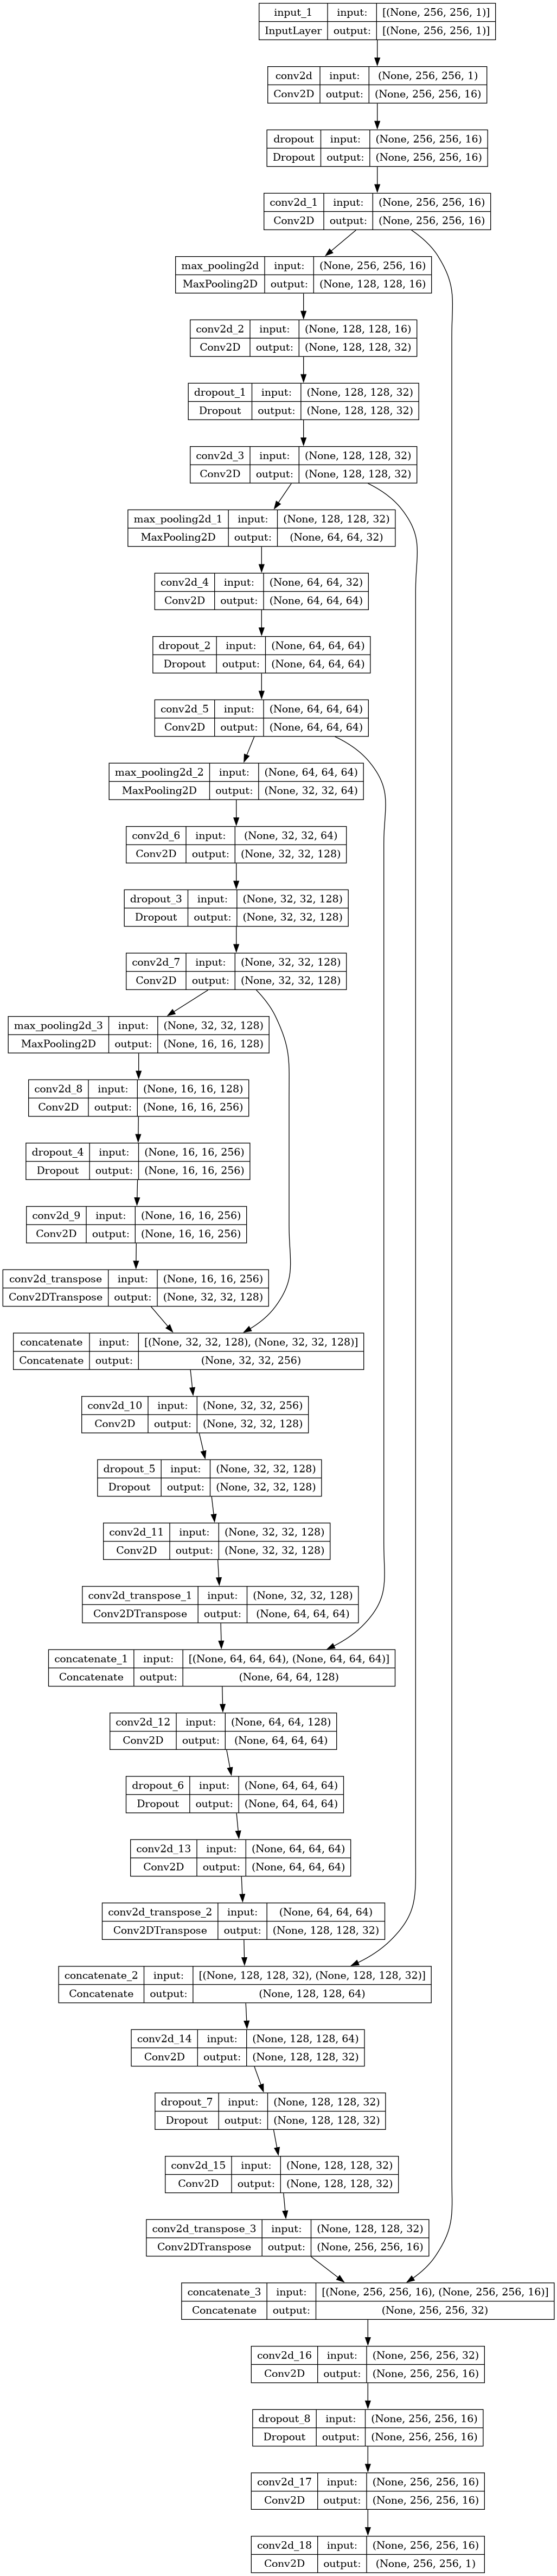

In [12]:
# Plot the model
plot_model(unet_model, to_file='model.png', show_shapes=True, show_layer_names=True)

<a id='8'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Model Training</p> 

In [13]:
# Train the model
history = unet_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=10  # For a real model, you might need many more epochs
)

Epoch 1/10


2023-12-27 07:21:43.102599: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


8/8 [==============================] - 38s 1s/step - loss: 9.8432 - accuracy: 0.9379 - val_loss: 3.9465 - val_accuracy: 0.9886
Epoch 2/10
8/8 [==============================] - 3s 321ms/step - loss: 3.6720 - accuracy: 0.9867 - val_loss: 1.5364 - val_accuracy: 0.9886
Epoch 3/10
8/8 [==============================] - 3s 323ms/step - loss: 1.5451 - accuracy: 0.9730 - val_loss: 0.4887 - val_accuracy: 0.9886
Epoch 4/10
8/8 [==============================] - 3s 323ms/step - loss: 0.8089 - accuracy: 0.9694 - val_loss: 0.3336 - val_accuracy: 0.9886
Epoch 5/10
8/8 [==============================] - 3s 323ms/step - loss: 0.5857 - accuracy: 0.9713 - val_loss: 0.1852 - val_accuracy: 0.9886
Epoch 6/10
8/8 [==============================] - 3s 323ms/step - loss: 0.3896 - accuracy: 0.9732 - val_loss: 0.1239 - val_accuracy: 0.9885
Epoch 7/10
8/8 [==============================] - 3s 324ms/step - loss: 0.2437 - accuracy: 0.9714 - val_loss: 0.5573 - val_accuracy: 0.9585
Epoch 8/10
8/8 [=================

<a id='9'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Evaluating the Trained UNet Model</p> 

In [14]:
# Evaluate the model
val_loss, val_acc = unet_model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_acc}")

1/1 [==============================] - 0s 73ms/step - loss: 0.0671 - accuracy: 0.9886
Validation Accuracy: 0.9885510206222534


In [15]:
# Load test images (assuming similar folder structure as training)
test_base_path = '/kaggle/input/blood-vessel-segmentation/test'
test_image_files = []

for dataset in os.listdir(test_base_path):
    images_path = os.path.join(test_base_path, dataset, 'images')
    if os.path.isdir(images_path):
        test_image_files += sorted([os.path.join(images_path, f) for f in os.listdir(images_path) if f.endswith('.tif')])

# Preprocess test images (similar to training images preprocessing)
test_images = np.array([preprocess_image(f) for f in test_image_files])


In [16]:
# Predict masks
predicted_masks = unet_model.predict(test_images)

# Post-process masks: threshold and resize to original size
thresholded_masks = (predicted_masks > 0.5).astype(np.uint8)

1/1 [==============================] - 1s 1s/step


In [17]:
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    rle = ' '.join(str(x) for x in runs)
    if rle=='':
        rle = '1 0'
    return rle

In [18]:
import pandas as pd

rles = [rle_encode(mask.reshape(256, 256)) for mask in thresholded_masks]
ids = [f'{p.split("/")[-3]}_{os.path.basename(p).split(".")[0]}' for p in test_image_files]

submission = pd.DataFrame({
    "id": ids,
    "rle": rles
})

In [19]:
submission.head(10)

,id,rle
0,kidney_5_0000,1 0
1,kidney_5_0001,1 0
2,kidney_5_0002,1 0
3,kidney_6_0000,1 0
4,kidney_6_0001,1 0
5,kidney_6_0002,1 0


In [20]:
submission.to_csv("submission.csv", index=False)

<a id='10'></a>
# <p style="background-color:#07041c;font-family:newtimeroman;color:#d3d1e6;font-size:120%;text-align:center;border-radius:40px 40px;">Conclusion and Future Directions</p> 

The UNET model is the simplest model for Biomedical Image Segmentation and here you can see overfitting is happening. You would have to use alot of tuning, preprocessing, maybe transfer learning, and several other hit and trials to improve the performance.

Checkout my SegNet and Attention UNet models in the following respective notebooks, which are not overfitting and gives better results out of the box:

* [SegNet](https://www.kaggle.com/code/salmankhaliq22/sennet-hoa-segnet-tensorflow-starter)
* [Attention UNet](https://www.kaggle.com/code/salmankhaliq22/sennet-hoa-attention-unet-tensorflow-starter)
* [Comparing Denoising Techniques using OpenCV and skimage](https://www.kaggle.com/code/salmankhaliq22/opencv-skimage-denoising-techniques)